# Storytelling Visualization (Data Stories)

To create a data story, we need to wrap numerical facts into events that show change.

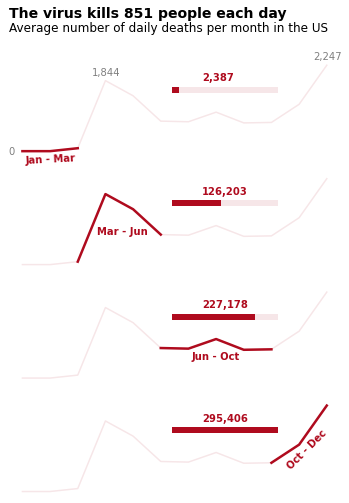

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

death_toll = pd.read_csv('covid_avg_deaths.csv')
deaths = [2387, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,8))

'''
The function returns two objects: a Figure and an array of four Axes objects. We use (ax1, ax2, ax3, ax4) to assign each object within that array to a different variable.

To draw on the individual plots, we can use Matplotlib methods on each of the four Axes objects. Below, we draw a line plot on the first and the third plot.
'''
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    # remove the y- and x-tick labels for all plots
    ax.set_yticklabels([]) 
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) # Remove all ticks
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False) # Remove all the spines
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)

# add x- and y-coordinates
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e',
         weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e',
         weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e',
         weight='bold', rotation=45)

# title
ax1.text(0.5, 3500, 'The virus kills 851 people each day', size=14, weight='bold')
# subtitle
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US', size=12)

# progress bar
# first line
for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8, linewidth=6, color='#af0b1e', alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax, linewidth=6, color='#af0b1e')
    ax.text(7.5, 1850, format(death, ','), color='#af0b1e', weight='bold')
    
plt.show()